## Expand Gene identities

In [1]:
# %reset
import pandas as pd
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/1.Lasiomatta_megera"

gene_table = pd.read_csv(f"{location}/2.Annotation_busco_prediction/full_table.tsv", sep= "\t")
gene_table

,Busco_id,Status,Sequence,Gene_Start,Gene_End,Strand,Score,Length,OrthoDB url,Description
0,0at7088,Complete,24,4461569.0,4349795.0,-,17074.6,8018.0,https://v10-1.orthodb.org/?query=0at7088,Immunoglobulin
1,1at7088,Complete,Z,1337207.0,1448954.0,+,9131.8,4245.0,https://v10-1.orthodb.org/?query=1at7088,Immunoglobulin
2,2at7088,Complete,5,9524326.0,9613919.0,+,25469.1,14629.0,https://v10-1.orthodb.org/?query=2at7088,EGF-like calcium-binding domain
3,3at7088,Complete,8,16889554.0,17031555.0,+,10478.1,5416.0,https://v10-1.orthodb.org/?query=3at7088,Spectrin repeat
4,4at7088,Complete,7,7646229.0,7751605.0,+,13223.7,6795.0,https://v10-1.orthodb.org/?query=4at7088,Spectrin repeat
...,...,...,...,...,...,...,...,...,...,...
5306,16855at7088,Fragmented,6,11334273.0,11335323.0,+,107.0,66.0,https://v10-1.orthodb.org/?query=16855at7088,"AT hook, DNA-binding motif"
5307,16938at7088,Complete,28,5240471.0,5245371.0,+,92.0,102.0,https://v10-1.orthodb.org/?query=16938at7088,uncharacterized protein LOC111359467
5308,16982at7088,Complete,6,18026995.0,18027492.0,+,118.6,111.0,https://v10-1.orthodb.org/?query=16982at7088,uncharacterized protein LOC110991765
5309,cycle,Complete,Z,27393173.0,27438198.0,+,116.9,120.0,https://v10-1.orthodb.org/?query=16982at7088,cycle


In [2]:
output = "Busco_id\tChromosome\tGene_Start\tGene_End"
for row_details in gene_table.itertuples():
    if not(pd.isna(row_details.Sequence)):
        if row_details.Gene_Start > row_details.Gene_End:
            gene_start = row_details.Gene_End
            gene_end = row_details.Gene_Start
        else:
            gene_start = row_details.Gene_Start
            gene_end = row_details.Gene_End
        try:
            output += f"\n{row_details.Busco_id}\t{row_details.Sequence}\t{int(max(0,gene_start-10000))}\t{int(gene_end+10000)}"
        except:
            print(row_details.Busco_id, gene_end+20000)
            assert False
    # print(row_details)
    # break
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'w') as out_file:
    out_file.write(output)

In [3]:
fst_dictionary = {}
# with open(f"{location}/1.FST_peaks_from_chris/two_pool_1%_0.154_5kb_merged.fst",'r') as fst_file:
with open(f"{location}/1.FST_peaks_from_chris/two_pool_5%_0.101_5kb_merged.fst",'r') as fst_file:
    for fst_lines in fst_file.readlines()[1:]:
        line_split = fst_lines.strip().split(",")
        fst_dictionary.setdefault(line_split[0],[])
        
        fst_dictionary[line_split[0]].append([int(line_split[1]), int(line_split[2])])
        
print(fst_dictionary)

{'1': [[37001, 75000], [82001, 84000], [94001, 100000], [118001, 121000], [128001, 129000], [204001, 205000], [247001, 248000], [268001, 269000], [354001, 359000], [371001, 378000], [508001, 509000], [733001, 734000], [748001, 764000], [800001, 804000], [944001, 950000], [987001, 988000], [1015001, 1016000], [1059001, 1060000], [1100001, 1101000], [1110001, 1111000], [1332001, 1333000], [1405001, 1406000], [1834001, 1838000], [1874001, 1875000], [1976001, 1977000], [2234001, 2237000], [2242001, 2243000], [2456001, 2457000], [2502001, 2509000], [2527001, 2528000], [2555001, 2556000], [2665001, 2689000], [2697001, 2698000], [2710001, 2711000], [2723001, 2724000], [2789001, 2792000], [2837001, 2839000], [2856001, 2857000], [2862001, 2863000], [3060001, 3062000], [3127001, 3128000], [3328001, 3329000], [3384001, 3385000], [3408001, 3409000], [3427001, 3431000], [3440001, 3441000], [3523001, 3524000], [3541001, 3542000], [3573001, 3579000], [3592001, 3593000], [3640001, 3649000], [3774001, 

In [4]:
gene_loc_dic = {}
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'r') as gene_loc_file:
    for gene_line in gene_loc_file.readlines()[1:]:
        line_split = gene_line.strip().split("\t")
        gene_loc_dic[line_split[0]] = [line_split[1],line_split[2],line_split[3]]
# print(gene_loc_dic)
        

In [5]:
# output_rho_set_location = "Gene,Chromosome,Location"
# with open(f"{location}/3.Rho_set_genes/Rho_set_gene2.txt", 'r') as rho_set_file:
#     for lines in rho_set_file.readlines():
#         rho_gene_name = lines.strip().split("\t")[0]
#         # print(lines.strip(),gene_loc_dic[lines.strip()])
#         # print(rho_gene_name)
#         chromosome,start,end = gene_loc_dic[rho_gene_name]
#         # print(chromosome,start,end)
#         output_rho_set_location +=  f"\n{rho_gene_name},{chromosome},{start}"

# # print(output_rho_set_location)
# with open(f"{location}/3.Rho_set_genes/Rho_set_location.csv", 'w') as rho_out_file:
#     rho_out_file.write(output_rho_set_location)
       

In [6]:
intersecting_genes = []
with open(f"{location}/3.Rho_set_genes/Rho_set_cluster.txt", 'r') as rho_set_file:
    for rho_set_count,lines in enumerate(rho_set_file.readlines()):
        rho_gene_name = lines.strip().split("\t")[0]
        # print(lines.strip(),gene_loc_dic[lines.strip()])
        try:
            chromosome,start,end = gene_loc_dic[rho_gene_name]
        except:
            continue
        # print(chromosome,start,end)
        for sections in (fst_dictionary[chromosome]):
            # print(sections)
            if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                # print(sections)
                print(lines, end = "")
                intersecting_genes.append(rho_gene_name)
                break
            # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
        # break
print("\n",len(intersecting_genes), rho_set_count, len(set((intersecting_genes))))
final_gene_number = len(intersecting_genes)

5423at7088
7993at7088
12705at7088
2453at7088
2032at7088
12831at7088
13413at7088
10801at7088
13986at7088
3016at7088
15035at7088
5821at7088
14245at7088
9985at7088
3683at7088
1846at7088
15100at7088
652at7088
4368at7088
1910at7088
4021at7088
4480at7088
190at7088
2905at7088
6122at7088
4998at7088
3023at7088
1947at7088
2599at7088
5650at7088
1300at7088
3363at7088
496at7088
821at7088
386at7088
6007at7088
4689at7088
8874at7088
3127at7088
6342at7088
717at7088
5057at7088
8375at7088
10447at7088
8427at7088
1709at7088
8007at7088
6156at7088
3667at7088
741at7088
9535at7088
2906at7088
13019at7088
4595at7088
6853at7088
8465at7088
3226at7088
4631at7088
12090at7088
11592at7088
9362at7088
13737at7088
8222at7088
12180at7088
5852at7088
4279at7088
4935at7088
10101at7088
10571at7088
274at7088
12326at7088
11858at7088
2201at7088
11288at7088
6779at7088
12510at7088
11158at7088
2938at7088
5679at7088
8306at7088
2939at7088
5486at7088
12212at7088
10601at7088
1144at7088
1628at7088
2813at7088
11619at7088
7044at7088
4799a

In [7]:
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

In [8]:
instersecting_genes_output = ""
for intersecting_gene_name in intersecting_genes:
    if intersecting_gene_name in gene_anno_dic:
        instersecting_genes_output += intersecting_gene_name+","+gene_anno_dic[intersecting_gene_name] + "\n"
    else:
        instersecting_genes_output += intersecting_gene_name+","+intersecting_gene_name + "\n"
# print(intersecting_genes)
with open(f"{location}/4.Intersections_test/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)
# print(instersecting_genes_output)

In [9]:
instersecting_genes_output = "geneid\n"+"\n".join(set(intersecting_genes))
with open(f"{location}/4.Intersections_test/1.For GSEA/1.Rho Set/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [10]:
busco_gene_list = []
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/0.Gene_id_list/Busco_gene_id.txt",'r') as busco_gene_list_file:
    for lines in busco_gene_list_file:
        busco_gene_list.append(lines.strip())
print(len(busco_gene_list))

4564


In [11]:
rho_set_size = rho_set_count
import random
intersecting_genes_length_list = []
for i in range(1000):
    print("run ",i)
    test_gene_list = random.sample(busco_gene_list, rho_set_size)
    # print(len(test_gene_list), len(set(test_gene_list)))
    # assert False
    intersecting_genes = []
    for gene_name in test_gene_list:
        try:
            chromosome,start,end = gene_loc_dic[gene_name]
        except:
            print(gene_name, "missing")
            pass
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    # print(gene_name,chromosome,start,end)
                    intersecting_genes.append(gene_name)
                    break
                    # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
                # break
        except:
            pass
    intersecting_genes_length_list.append(len(intersecting_genes))
print((intersecting_genes_length_list))

run  0
11558at7088 missing
10387at7088 missing
13972at7088 missing
7506at7088 missing
11066at7088 missing
14521at7088 missing
3212at7088 missing
8001at7088 missing
10333at7088 missing
12660at7088 missing
run  1
1504at7088 missing
14404at7088 missing
run  2
3161at7088 missing
1504at7088 missing
14404at7088 missing
run  3
4645at7088 missing
7506at7088 missing
13972at7088 missing
13532at7088 missing
10546at7088 missing
12834at7088 missing
run  4
14404at7088 missing
8811at7088 missing
run  5
8811at7088 missing
10546at7088 missing
4645at7088 missing
run  6
10333at7088 missing
11066at7088 missing
run  7
1504at7088 missing
4645at7088 missing
10387at7088 missing
7357at7088 missing
run  8
3161at7088 missing
10333at7088 missing
16088at7088 missing
11264at7088 missing
13972at7088 missing
12834at7088 missing
run  9
9108at7088 missing
10333at7088 missing
13972at7088 missing
4967at7088 missing
run  10
10546at7088 missing
run  11
15939at7088 missing
run  12
7400at7088 missing
3493at7088 missing
14404

In [12]:
# import numpy as np
# # print((intersecting_genes_length_list))
# str_list = ""
# for num in intersecting_genes_length_list:
#     str_list += f"{num}\n"
# with open(f"{location}/4.Intersections_test/10000_runs_5kb.txt", 'w') as out_file:
#     out_file.write(str_list)

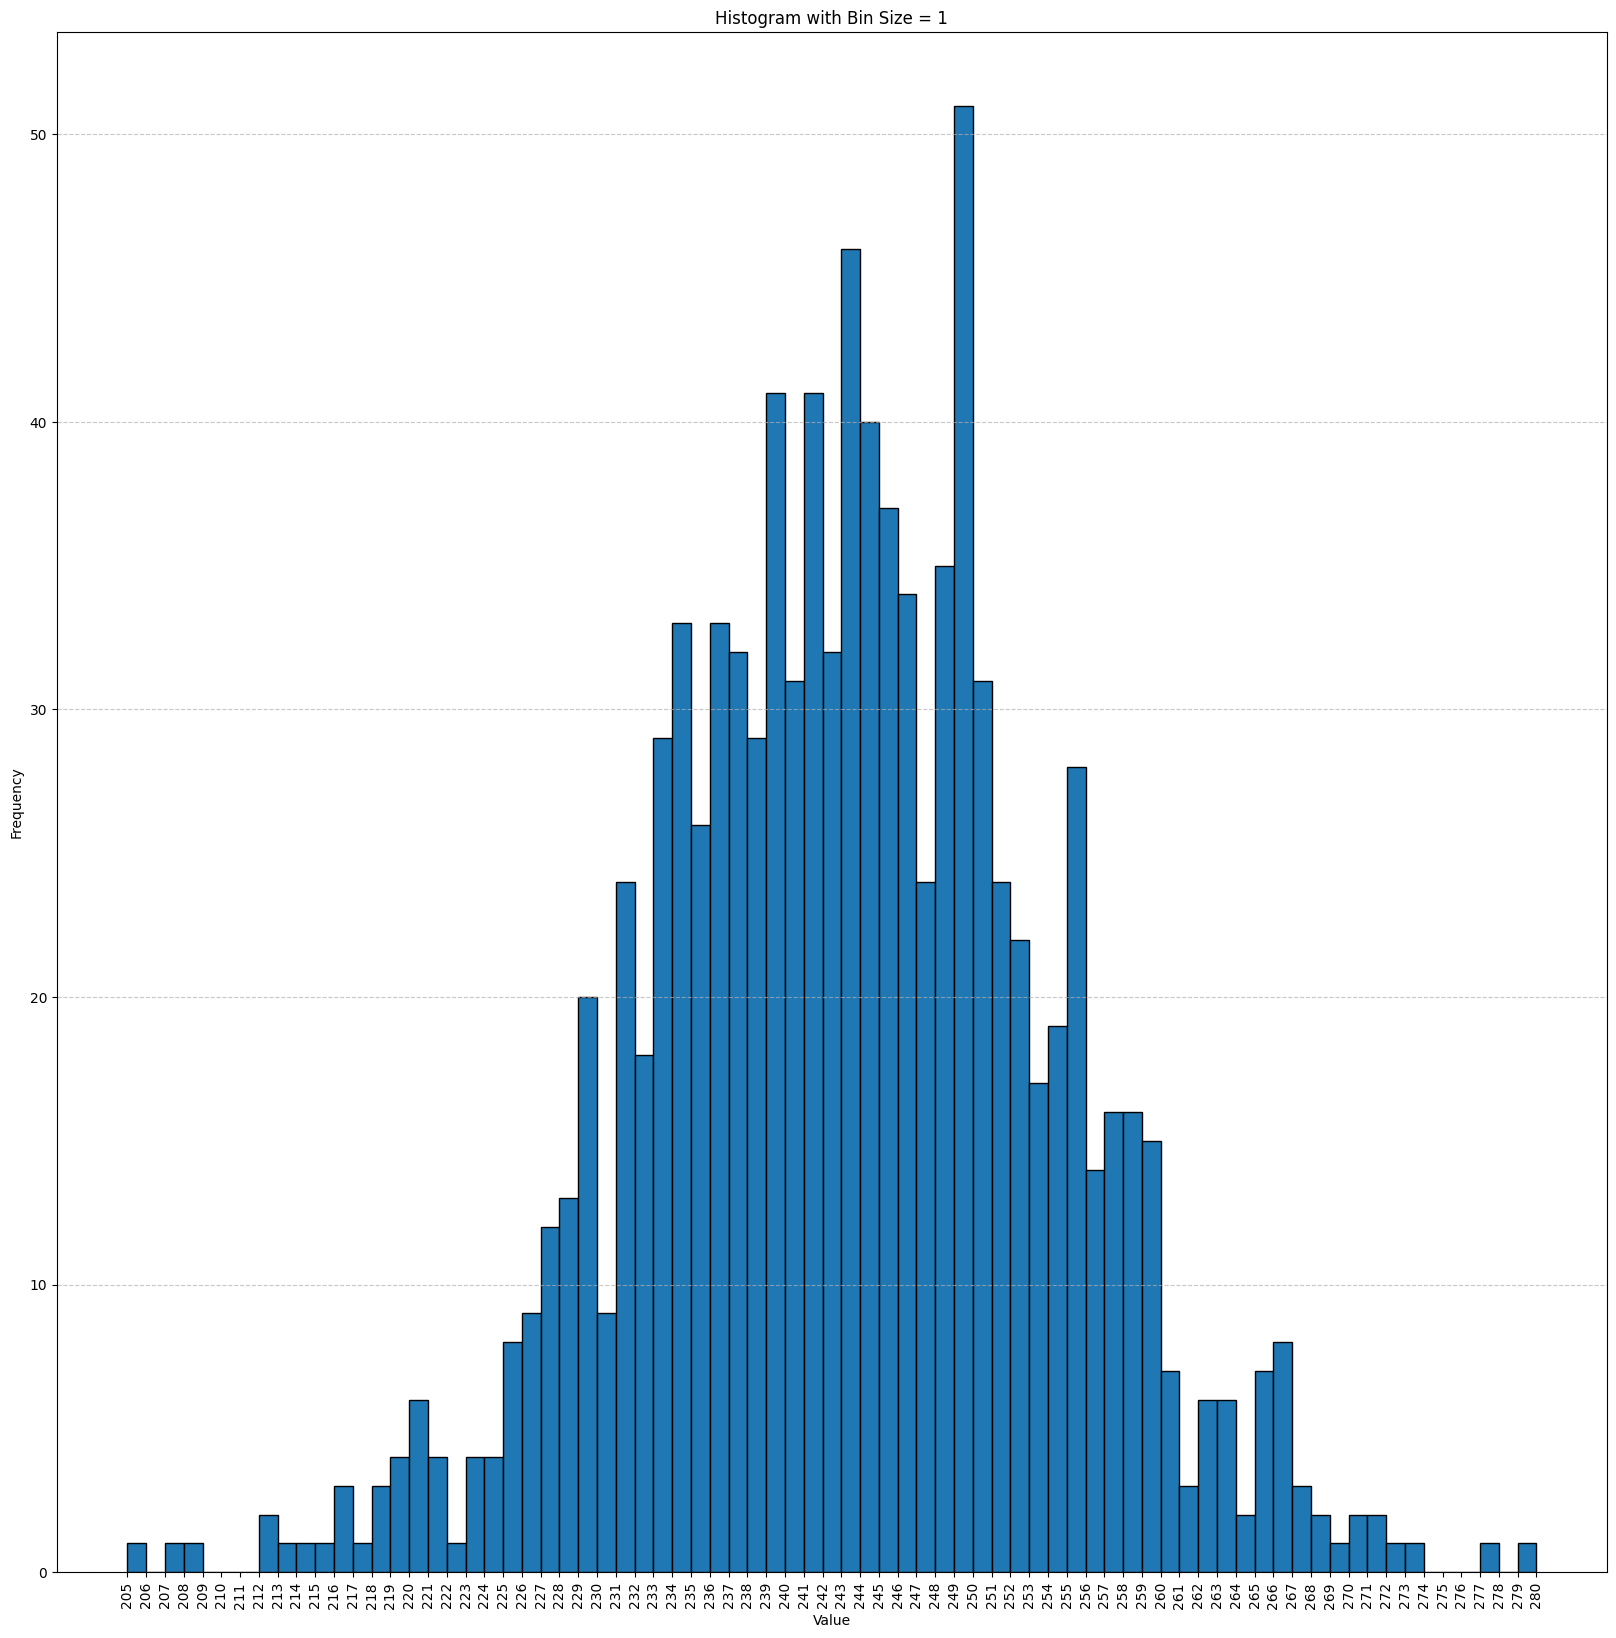

In [13]:
import matplotlib.pyplot as plt

# Sample data
data = intersecting_genes_length_list

# Define bins with size = 1
min_bin = min(data)
max_bin = max(data)
bins = range(min_bin, max_bin + 2)  # +2 to include the last value properly

# Plot
plt.figure(figsize=(20, 20))
plt.hist(data, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size = 1')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Always show details
import scipy.stats as stats

# Updated list of observations
observations = intersecting_genes_length_list

# [7, 7, 4, 7, 10, 2, 7, 10, 5, 10, 1, 0, 5, 4, 6, 7, 6, 9, 5, 1, 8, 7, 2, 10, 7, 9, 3, 11, 9, 0, 9, 5, 5, 2, 0, 12, 3, 6, 4, 2, 9, 5, 3, 2, 8, 2, 0, 6, 6, 1, 12, 3, 1, 3, 8, 12, 8, 0, 6, 4, 0, 7, 2, 7, 10, 2, 7, 3, 3, 1, 13, 8, 11, 8, 1, 6, 3, 0, 6, 5, 7, 2, 2, 7, 0, 11, 7, 9, 10, 8, 2, 4, 8, 7, 0, 3, 5, 0, 4, 8, 6, 4, 8, 1, 3, 5, 6, 6, 6, 0, 4, 6, 4, 2, 4, 4, 5, 10, 10, 0, 5, 3, 1, 7, 5, 2, 0, 0, 3, 0, 7, 8, 10, 6, 3, 4, 2, 8, 8, 0, 7, 5, 0, 7, 6, 5, 1, 0, 9, 7, 1, 13, 2, 10, 3, 9, 9, 5, 1, 5, 6, 7, 1, 2, 10, 8, 7, 1, 7, 6, 9, 5, 0, 11, 0, 0, 6, 2, 1, 1, 1, 6, 4, 9, 8, 4, 5, 9, 4, 15, 9, 0, 2, 0, 1, 3, 10, 3, 9, 3, 4, 2, 1, 7, 4, 1, 1, 5, 3, 4, 14, 0, 0, 5, 5, 8, 7, 0]

# Calculate the proportion of values greater than or equal to 10
value_of_interest = final_gene_number
print(value_of_interest)
count_extreme = sum(x >= value_of_interest for x in observations)
p_value = count_extreme / len(observations)

p_value

271


0.006

In [17]:
output = "Count"
for count in intersecting_genes_length_list:
    output += f"\n{count}"
with open(f"/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/1.Density_plots_5%/lassiommata_density_plot_x_{final_gene_number}_p_{p_value}.csv", 'w') as out_file:
    out_file.write(output)

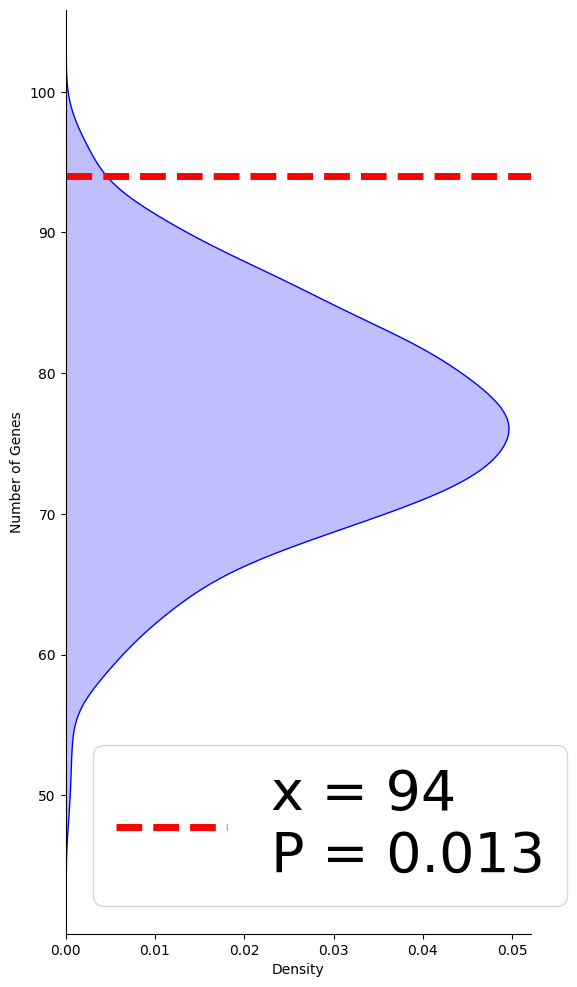

In [27]:
import seaborn as sns
plt.figure(figsize=(6, 12))
sns.kdeplot(y=data, fill=True, linewidth=1, color="blue")

# Vertical line at defined place (example: x=10)
defined_value = value_of_interest
plt.axhline(defined_value, color='red', linestyle='--', linewidth=5, label=f"x = {defined_value}\nP = {p_value}")
sns.despine(top=True, right=True)
plt.ylabel("Number of Genes")
plt.xlabel("Density")
# plt.title("Smooth Density Plot with Vertical Line")
plt.legend(fontsize=40)
# plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/2.Density_plot_1%/lassiommata_density_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()